In [2]:
data = {}

path_to_data = r'all_time-series/ts_cut'

import os
import numpy as np
import re

parser_regex = r'(ihb|china|rmet)_(open|close)_strategy-(\d)_(GSR|noGSR).npy'
extractor = re.compile(parser_regex)

items = {atlas_name : {dataset_name : []
                       for dataset_name in ['china', 'ihb', 'rmet']}
         for atlas_name in ['HCPex', 'Brainnetome', 'AAL', 'Schaefer200']}

for root, dirs, files in os.walk(path_to_data):
    for file in files:
        atlas = root.split(os.sep)[1]
        source = root.split(os.sep)[2]
        items[atlas][source].append(np.load(os.path.join(root, file)))

In [3]:
items['AAL']['rmet'][0][0].shape

(120, 116)

In [4]:
len(items['AAL']['rmet'][0])

63

In [5]:
import pandas as pd
import numpy as np
from itertools import combinations, product

data_dif = np.empty((539028, 121))
data_same = np.empty((36288, 121))
at = 'AAL'
db = 'rmet'
i = 0

for person1, person2 in combinations(range(len(items[at][db][0])), r=2):
    for teg1, teg2 in combinations(range(len(items[at][db])), r=2):
        a = items[at][db][teg1][person1][:, 0]
        b = items[at][db][teg2][person2][:, 0]
        data_dif[i] = np.hstack([a - b, np.array([0])])
        i += 1

i = 0
for person in range(len(items[at][db][0])):
    for teg1, teg2 in product(range(len(items[at][db])), repeat=2):
        a = items[at][db][teg1][person][:, 0]
        b = items[at][db][teg2][person][:, 0]
        data_same[i] = np.hstack([a - b, np.array([1])])

        i += 1

In [6]:
data = np.vstack([data_dif, data_same])

In [7]:
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,-3.003502,1.878287,1.535319,-1.500392,-0.207987,0.914486,0.085258,0.408476,1.452729,-0.381543,...,0.095940,1.382500,-0.050616,-0.007309,0.373965,2.982292,-0.244443,-0.968617,0.060165,0.0
1,0.900279,-0.621754,0.985660,-0.162371,1.072526,-0.142804,0.465783,-1.161812,0.219893,0.478300,...,1.027404,0.077074,-0.144718,0.972101,1.548311,-0.857258,-1.052086,1.059391,0.691820,0.0
2,-0.421223,0.653929,0.160793,0.169228,0.415801,-1.340829,0.160518,-0.380446,0.271283,-0.412296,...,-0.022526,-0.897641,-0.040877,-0.095517,1.162218,0.051219,-0.018018,0.219148,1.562944,0.0
3,-0.299937,0.220088,0.101969,-0.394103,0.789188,-0.244584,-0.053282,-0.523696,-0.152756,-0.446880,...,0.309457,-0.417669,-0.199900,0.605009,-0.694727,0.209619,-0.376558,-0.142171,-0.111320,1.0
4,0.702079,-0.404777,-0.244475,-0.305849,-0.479297,1.185957,-0.243024,-0.007748,1.124543,-0.620684,...,0.184112,-0.559548,0.382745,-0.172631,0.283122,-0.163789,0.384479,0.228295,0.168419,0.0


In [9]:
from sklearn.model_selection import train_test_split

y = df[120]
X = df.drop(120, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [11]:
!pip install catboost

In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
260752,0.583944,-1.015498,0.732879,-0.320535,1.256087,-0.693871,0.302318,-0.097984,0.937791,-0.952656,...,0.613364,0.700636,-0.424173,0.786628,0.275788,-0.646673,-0.556208,0.153778,0.330286,0.517063
218513,2.139109,-0.618858,1.104771,-1.583593,-1.188435,-0.532143,-0.947943,-0.509780,-0.651631,-0.214661,...,0.687799,0.297948,-0.226428,-0.098078,0.335033,0.349346,0.135021,-0.026104,0.241985,-0.826969
75440,0.689509,0.697784,0.750714,-0.354101,0.296947,-0.916960,0.378102,0.495506,1.692924,-2.257425,...,-0.520608,-0.825182,-1.412857,0.024354,-0.567521,-0.084790,-0.791583,0.969596,0.223159,-0.040493
213045,0.283929,1.117382,1.371201,-0.331522,-0.744142,-0.670464,-0.123713,-0.285104,-0.811307,0.781710,...,-0.300893,0.334634,-0.480941,0.295162,-0.239888,-1.020996,0.546621,-0.191714,0.806327,-0.289840
538992,-0.009628,0.604509,1.346133,0.333306,-0.064746,0.669413,-1.115818,-1.054347,-0.127921,0.638751,...,0.562298,-0.723517,-0.312105,-0.731291,1.053592,0.217672,-0.071452,0.498148,0.276974,0.280611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129110,0.147928,-0.466450,-2.579195,-0.222997,0.492915,0.010183,0.228875,0.077775,0.334568,-0.346156,...,0.375292,0.953185,-0.304342,-0.407476,0.491738,-0.154852,0.547828,-0.943719,0.616819,-1.027851
331927,1.964038,-1.154690,1.389507,-0.872590,0.576683,0.163802,-1.885467,0.145740,-0.375998,-0.577524,...,-0.998480,0.352234,-0.908597,0.082418,-1.018967,0.352738,-0.311563,-2.071302,0.874419,0.836225
56845,-1.050082,0.985872,0.534926,-0.390432,-0.241222,0.674184,-0.182511,-0.791589,0.737421,-0.622484,...,0.164597,0.226782,0.295148,-0.824317,-0.091623,-1.276609,0.790654,0.149580,0.134539,-1.001948
566940,0.790158,-1.354795,0.631185,-0.346959,-0.998696,-0.362117,0.045769,-0.388163,0.364349,-0.305663,...,0.234024,0.324400,-1.168460,0.082392,0.550801,-0.050250,-0.043080,-0.067701,-0.121221,-1.388965


In [12]:
!pip install numpy

In [22]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y = df[120]
X = df.drop(120, axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=52
)

model = CatBoostClassifier(loss_function='Logloss', verbose=100)
param_grid = {
    'iterations': [300, 500],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
print(accuracy, f1, recall, precision)


0:	learn: 0.6293532	total: 37ms	remaining: 11.1s
100:	learn: 0.1253237	total: 3.98s	remaining: 7.83s
200:	learn: 0.0985212	total: 11.3s	remaining: 5.56s
299:	learn: 0.0806939	total: 18.3s	remaining: 0us
0:	learn: 0.6292745	total: 77.6ms	remaining: 23.2s
100:	learn: 0.1245501	total: 8.36s	remaining: 16.5s
200:	learn: 0.0988005	total: 15.3s	remaining: 7.53s
299:	learn: 0.0809604	total: 22.3s	remaining: 0us
0:	learn: 0.6287694	total: 76.3ms	remaining: 22.8s
100:	learn: 0.1231623	total: 5.54s	remaining: 10.9s
200:	learn: 0.0971694	total: 8.98s	remaining: 4.42s
299:	learn: 0.0799474	total: 13.7s	remaining: 0us
0:	learn: 0.5714667	total: 74.5ms	remaining: 22.3s
100:	learn: 0.0997304	total: 7.24s	remaining: 14.3s
200:	learn: 0.0671428	total: 14.8s	remaining: 7.29s
299:	learn: 0.0456026	total: 21.9s	remaining: 0us
0:	learn: 0.5713145	total: 85.6ms	remaining: 25.6s
100:	learn: 0.0985906	total: 8.21s	remaining: 16.2s
200:	learn: 0.0673800	total: 16.1s	remaining: 7.92s
299:	learn: 0.0448378	total

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def test_model_metrics(model, X_test, y_test, thresholds):
    y_pred = model.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }
    for metric_name, value in metrics.items():
        threshold = thresholds.get(metric_name)
        print(f"{metric_name.capitalize()}: {value:.4f} (требуется >= {threshold})")
        assert value >= threshold, f"{metric_name.capitalize()} ниже порога: {value:.4f} < {threshold}"

    print("Все тесты пройдены успешно!")
    return metrics

thresholds = {
    'accuracy': 0.90,
    'f1': 0.90,
    'recall': 0.90,
    'precision': 0.90
}

metrics = test_model_metrics(best_model, X_test, y_test, thresholds)


NameError: name 'best_model' is not defined

(402721, 120)
(402721,)


In [14]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
model.predict_proba(X_test)

array([[0.51065014, 0.48934986],
       [0.51065014, 0.48934986],
       [0.51065014, 0.48934986],
       ...,
       [0.51065014, 0.48934986],
       [0.51065014, 0.48934986],
       [0.51065014, 0.48934986]])

In [16]:
model.predict(X_test, prediction_type='RawFormulaVal')

array([-0.04260701, -0.04260701, -0.04260701, ..., -0.04260701,
       -0.04260701, -0.04260701])

In [17]:
import pandas as pd

df = pd.DataFrame(list([val] for val in data.values()), index=pd.MultiIndex.from_tuples(data.keys(), names=['atlas', 'dataset', 'class', 'strategy', 'GSR']))
df.sort_index(inplace=True);

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
df.head()

0
atlas dataset class strategy GSR                                                     
AAL   rmet    close 2        GSR    [[[0.49872941386279845, -0.8318829721130215, 1...
                             noGSR  [[[0.678245159604991, -0.25980114630165074, 0....
                    3        GSR    [[[0.8165110807596462, -0.5689161667585938, 1....
                             noGSR  [[[0.9840598021404207, -0.07008979256868253, 0...
              open  2        GSR    [[[0.02001187235572125, -0.07345551936605457, ...

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.iloc[0].item()

array([[[ 4.98729414e-01, -8.31882972e-01,  1.08565267e+00, ...,
         -1.25194687e+00,  8.62937301e-01, -1.42285915e+00],
        [-8.73694358e-01, -7.73899958e-02, -2.13107072e-01, ...,
          6.71831789e-01,  3.79522605e-01,  5.21428611e+00],
        [ 7.03247485e-01,  3.44189012e-01,  2.00920395e-01, ...,
         -8.43784024e-01, -1.17797884e+00, -6.96275327e-01],
        ...,
        [-9.49996535e-01,  6.39507108e-02, -3.73141534e-01, ...,
          9.44741947e-01,  7.89769971e-01, -8.64939319e-02],
        [ 7.92320069e-01, -3.83750067e-01,  7.60673248e-01, ...,
         -1.25950660e+00, -1.83463172e+00, -3.79737211e-02],
        [-1.33242480e-01, -4.73495447e-01,  1.00473557e+00, ...,
         -2.04185118e-01, -5.51008796e-02,  1.26752761e+00]],

       [[ 3.79468368e-01,  1.17829383e-01,  4.18010734e-01, ...,
          4.49394836e-01, -5.78737258e-02, -5.93763917e+00],
        [-1.95470896e-01,  3.01472399e-01,  2.40322049e-01, ...,
          1.34769213e+00,  1.84679381e

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.2 MB/s eta 0:00:00


In [ ]:
df.iloc[2]

,AAL
,rmet
,close
,3
,GSR
0,"[[[0.8165110807596462, -0.5689161667585938, 1...."


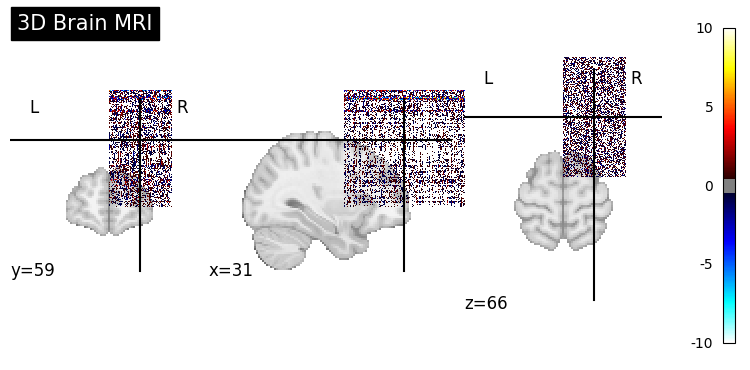

In [ ]:
from nilearn import plotting
from nibabel import Nifti1Image
from nilearn import image

# Предположим, что у тебя есть ndarray с именем 'data' с формой (63, 120, 116)
data = df.iloc[2].item()

# Создаем объект Nifti1Image, который можно передать в nilearn
img = Nifti1Image(data, affine=np.eye(4))
smoothed_img = image.smooth_img(img, fwhm=6)
# Используем nilearn для визуализации
plotting.plot_stat_map(img, title="3D Brain MRI", threshold=0.5,resampling_interpolation='continuous')
plotting.show()


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/spm_auditory

[fetch_spm_auditory] Data absent, downloading...

[fetch_single_file] Downloading data from 
https://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.bids.zip ...

[_chunk_report_] Downloaded 2727936 of 30176409 bytes (9.0%%,   10.2s remaining)

[_chunk_report_] Downloaded 7561216 of 30176409 bytes (25.1%%,    6.1s remaining)

[_chunk_report_] Downloaded 12451840 of 30176409 bytes (41.3%%,    4.3s remaining)

[_chunk_report_] Downloaded 16375808 of 30176409 bytes (54.3%%,    3.4s remaining)

[_chunk_report_] Downloaded 20480000 of 30176409 bytes (67.9%%,    2.4s remaining)

[_chunk_report_] Downloaded 24551424 of 30176409 bytes (81.4%%,    1.4s remaining)

[_chunk_report_] Downloaded 28712960 of 30176409 bytes (95.2%%,    0.4s remaining)

[fetch_single_file]  ...done. (8 seconds, 0 min)

[uncompress_file] Extracting data from /root/nilearn_data/spm_auditory/MoAEpilot.bids.zip...

[uncompress_file] .. done.

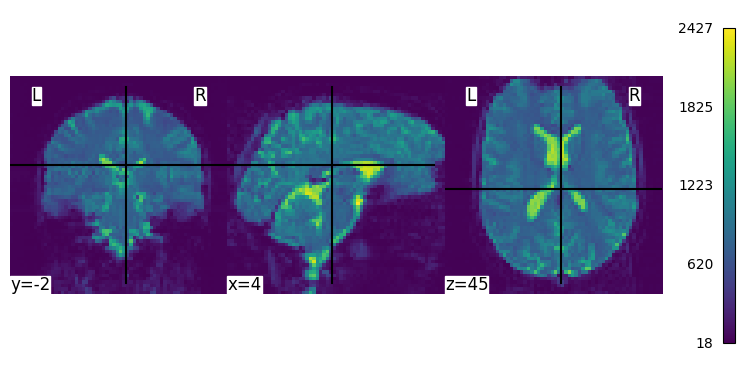

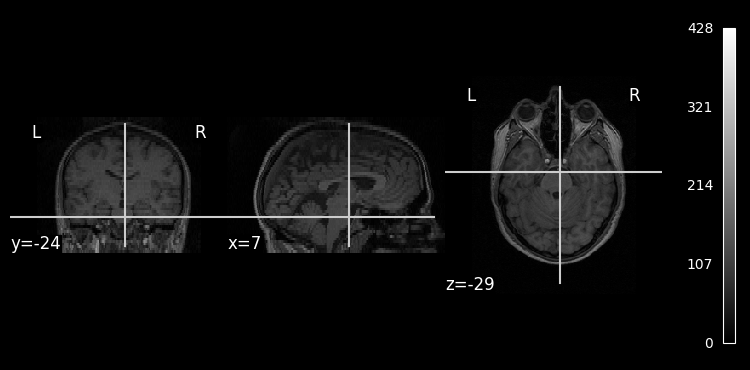

In [ ]:
from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()

from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show

fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)
plot_img(mean_img, colorbar=True, cbar_tick_format="%i")

plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

show()

0
atlas dataset class strategy GSR                                                     
AAL   rmet    close 2        GSR    [[[0.49872941386279845, -0.8318829721130215, 1...
                             noGSR  [[[0.678245159604991, -0.25980114630165074, 0....
                    3        GSR    [[[0.8165110807596462, -0.5689161667585938, 1....
                             noGSR  [[[0.9840598021404207, -0.07008979256868253, 0...
              open  2        GSR    [[[0.02001187235572125, -0.07345551936605457, ...